# IBM Data Science Final Project

_Louis X. Meikle_

## Introduction

I live in London and if there's one thing I've realised by living here a good two decades is that London is diverse, varied and vibrant in it's culture; a true synthesis of identies and ideas. So, accordingly, I've wondered about how to apply my data science skillset to my city. Then, I thought "How can I make sense of this madness and how can I help people with my conclusions?". I then considered that could create a system that allows people to put in a place they already like and get a reccomendation out!
Hopefully, by using this, I should be able to give people fair reccomendations so that they have a good time out in London!

## Business Problem

Let us say that a ficticous business (which I will hence refer to as Mercury Travel Ltd) wants to create a recommender system that allows for it's clients to be recommeded a location in London to go to based on previous places they liked. This is done because their previous method (which involved taking local and possibly biased tips) was ineffecitive and often led clients to unpleasant locations. The goal here it to create a recommendation system that can accurately and reliably give a recommendation to someone given their prior locations.

I will be using K-Means clustering for my segmentation of different groups in London as it produces clusters with high similarity and it is also a fairly reliable approach so it is fairly decent for a recommender system. I am also using an item-based approach to constructing my recommender system not only because I can't gain data about individual preferences at the moment but also because locations change less frequently than user preferences so the system will generally be more stable.

(For a summary for the differences in recommender systems see below:)

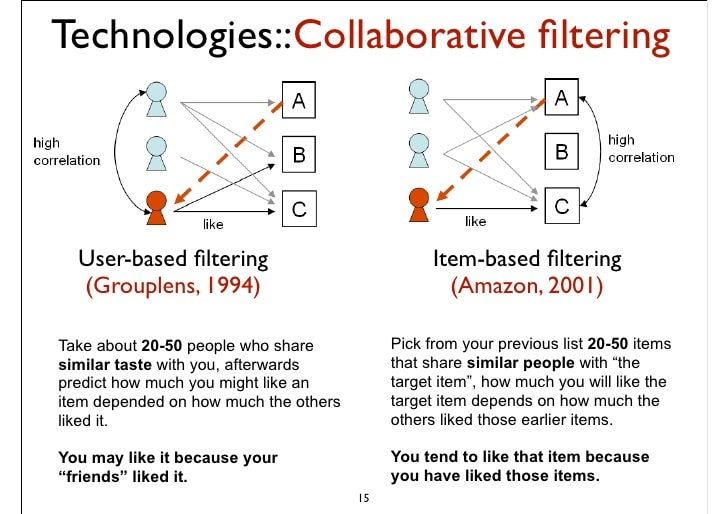

## Data

My data will be retrieved from the Foursquare API as it has a comprehensive list of many different types of locations in London as well as tangential data such as tips and reviews that could help me to clean my data set. Foursquare can have some slight problems in reliability given that data is still crowdsourced so we will have to implement some cleaning methods for the data to make sure that it allows for a well functioning model. After all, if we have a poor input we're going to get a poor output.

_Library Import:_

In [1]:
import pandas as pd
import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import matplotlib.colors as colors
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
import re
import requests
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Initially I intended to use beautiful soup to extract a table from Wikipedia regarding London postcode and location data. However, extraction became problematic especially when the table was inconsistent with it's view of what constituted a 'district' and was possibly flawed given that it had come from Wikipedia. 

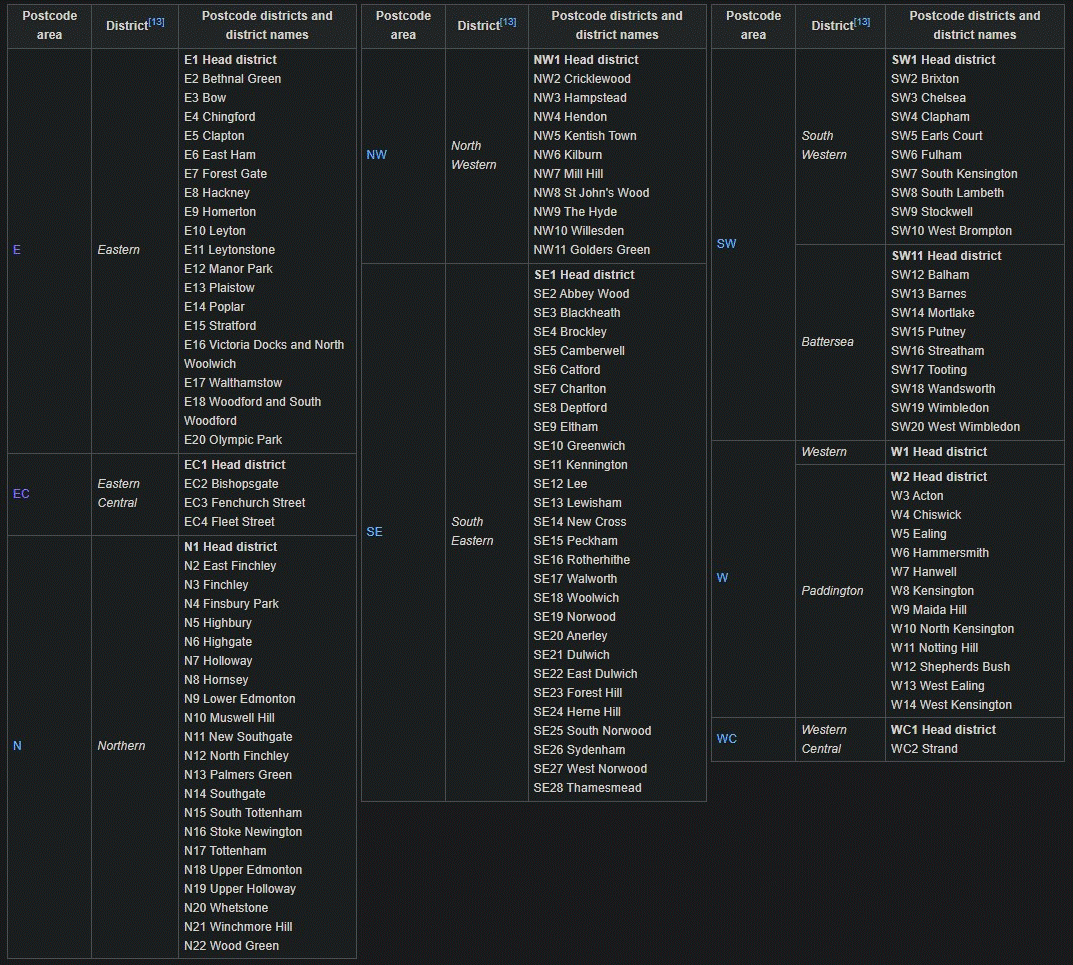

This table was alright but I didn't want to have any unnecessary errors later especially with the inconsistencies such as multiple postcodes being called 'Head district' which could confuse things and some districts being called compass direction like 'Northern' and 'Eastern' and others being called borough names like 'Battersea' and 'Paddington'. Because of this (and also because beautiful.soup was failing for some unknown reason :/) I decided to format the table manually in Excel. This would prevent unnecessary errors and mishaps with the webscraping method and would most likely give me a more reliable table. However, it was much more time consuming and annoying to complete and did introduce my own level of bias into the data set. Nevertheless, I think that removing errors and cleaning the data manually at this stage was worth it for the later output.

In [2]:
df = pd.read_excel(r'C:\Users\louis\Dropbox\Work\Data Science Files\Final Project Files\PostcodeData.xlsx')
print (df)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\louis\\Dropbox\\Work\\Data Science Files\\Final Project Files\\PostcodeData.xlsx'

First of all, we don't want to give someone a location which has low or no reviews as that's a strong indicator that the location is not worth going to. This means that we will have to eliminate all values with less than 50 reviews. Likewise, we're going to elimate all locations with a rating less than 7.5 out of 10. These filter are being applied to make sure that we get a location that is not only reliable enough to have a good amount of reviews but also of a high enough quality that people would want to go there.